# Regularisation for Linear Regression

Regularisation is a technique commonly used in Machine Learning to prevent overfitting. It consists on adding terms to the objective function such that the optimisation procedure avoids solutions that just learn the training data. Popular techniques for regularisation in Supervised Learning include Lasso Regression, Ridge Regression and the Elastic Net. 

In this Assignment, you will be looking at Ridge Regression and devising equations to optimise the objective function in Ridge Regression using two methods: a closed-form derivation and the update rules for stochastic gradient descent. You will then use those update rules for making predictions on a Air Quaility dataset.

## Ridge Regression

Let us start with a data set for training $\mathcal{D} = \{\mathbf{y}, \mathbf{X}\}$, where the vector $\mathbf{y}=[y_1, \cdots, y_n]^{\top}$ and $\mathbf{X}$ is the design matrix from Lab 3, this is, 

\begin{align*}
    \mathbf{X} = 
                \begin{bmatrix}
                        1 & x_{1,1} & \cdots & x_{1, D}\\
                        1 & x_{2,1} & \cdots & x_{2, D}\\
                   \vdots &  \vdots\\
                        1 & x_{n,1} & \cdots & x_{n, D}
                \end{bmatrix}
               = 
               \begin{bmatrix}
                      \mathbf{x}_1^{\top}\\
                       \mathbf{x}_2^{\top}\\
                          \vdots\\
                        \mathbf{x}_n^{\top}
                \end{bmatrix}.
\end{align*}

Our predictive model is going to be a linear model

$$ f(\mathbf{x}_i) = \mathbf{w}^{\top}\mathbf{x}_i,$$

where $\mathbf{w} = [w_0\; w_1\; \cdots \; w_D]^{\top}$.

The **objetive function** we are going to use has the following form

$$ J(\mathbf{w}, \alpha) = \frac{1}{n}\sum_{i=1}^n (y_i - f(\mathbf{x}_i))^2 + \frac{\alpha}{2}\sum_{j=0}^D w_j^2,$$

where $\alpha>0$ is known as the *regularisation* parameter.

The first term on the right-hand side (rhs) of the expression for $J(\mathbf{w}, \alpha)$ is very similar to the least-squares objective function we have seen before, for example in Lab 3. The only difference is on the term $\frac{1}{n}$ that we use to normalise the objective with respect to the number of observations in the dataset. 

The first term on the rhs is what we call the "fitting" term whereas the second term in the expression is the regularisation term. Given $\alpha$, the two terms in the expression have different purposes. The first term is looking for a value of $\mathbf{w}$ that leads the squared-errors to zero. While doing this, $\mathbf{w}$ can take any value and lead to a solution that it is only good for the training data but perhaps not for the test data. The second term is regularising the behavior of the first term by driving the $\mathbf{w}$ towards zero. By doing this, it restricts the possible set of values that $\mathbf{w}$ might take according to the first term. The value that we use for $\alpha$ will allow a compromise between a value of $\mathbf{w}$ that exactly fits the data (first term) or a value of $\mathbf{w}$ that does not grow too much (second term).

This type of regularisation has different names: ridge regression, Tikhonov regularisation or $\ell_2$ norm regularisation. 

### Question 1: $J(\mathbf{w}, \alpha)$ in matrix form (2 marks)

Write the expression for $J(\mathbf{w}, \alpha)$ in matrix form. Include ALL the steps necessary to reach the expression.

#### Question 1 Answer

Write your answer to the question in this box.

The **objetive function** we are going to use has the following form

$$ J(\mathbf{w}, \alpha) = \frac{1}{n}\sum_{i=1}^n (y_i - f(\mathbf{x}_i))^2 + \frac{\alpha}{2}\sum_{j=0}^D w_j^2,$$

We also known that

$$ f(\mathbf{x}_i) = \mathbf{w}^{\top}\mathbf{x}_i,$$
$$ \sum_{j=0}^D w_j^2 = \mathbf{w}^{\top}\mathbf{w} $$

We write our objective in the folowing form
$$
J(\mathbf{w}, \alpha) = \frac{1}{n}(\mathbf{y} - \mathbf{X}\mathbf{w})^\top(\mathbf{y} - \mathbf{X}\mathbf{w}) + \frac{\alpha}{2}\mathbf{w}^{\top}\mathbf{w}
$$

where the vector $\mathbf{y}=[y_1, \cdots, y_n]^{\top}$,  $\mathbf{w} = [w_0\; w_1\; \cdots \; w_D]^{\top}$ and 
\begin{align*}
    \mathbf{X} = 
                \begin{bmatrix}
                        1 & x_{1,1} & \cdots & x_{1, D}\\
                        1 & x_{2,1} & \cdots & x_{2, D}\\
                   \vdots &  \vdots\\
                        1 & x_{n,1} & \cdots & x_{n, D}
                \end{bmatrix}
               = 
               \begin{bmatrix}
                      \mathbf{x}_1^{\top}\\
                       \mathbf{x}_2^{\top}\\
                          \vdots\\
                        \mathbf{x}_n^{\top}
                \end{bmatrix}.
\end{align*}

So we can write **objetive function** in this matrix form

$$
J(\mathbf{w}, \alpha) = \frac{1}{n}( \begin{bmatrix}y_1\\y_2\\\vdots\\y_n
\end{bmatrix} - \begin{bmatrix}\mathbf{x}_1^{\top}\mathbf{w}\\\mathbf{x}_2^{\top}\mathbf{w}\\\vdots\\\mathbf{x}_n^{\top}\mathbf{w}\end{bmatrix})^\top( \begin{bmatrix}y_1\\y_2\\\vdots\\y_n
\end{bmatrix} - \begin{bmatrix}\mathbf{x}_1^{\top}\mathbf{w}\\\mathbf{x}_2^{\top}\mathbf{w}\\\vdots\\\mathbf{x}_n^{\top}\mathbf{w}\end{bmatrix}) + \frac{\alpha}{2}[w_0\; w_1\; \cdots \; w_D]\begin{bmatrix}[w_0\\w_1\\\vdots\\w_n]\end{bmatrix}
$$

So 

$$
J(\mathbf{w}, \alpha) = \frac{1}{n}[(y_1 - \mathbf{x}_1^{\top}\mathbf{w})^2 + (y_2 - \mathbf{x}_2^{\top}\mathbf{w})^2 + \cdots + (y_n - \mathbf{x}_n^{\top}\mathbf{w})^2] + \frac{\alpha}{2}(w_0^2 + w_1^2 + \cdots + w_n^2)
$$



## Optimising the objective function with respect to $\mathbf{w}$

There are two ways we can optimise the objective function with respect to $\mathbf{w}$. The first one leads to a closed form expression for $\mathbf{w}$ and the second one using an iterative optimisation procedure that updates the value of $\mathbf{w}$ at each iteration by using the gradient of the objective function with respect to $\mathbf{w}$,
$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}},
$$
where $\eta$ is the *learning rate* parameter and $\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}}$ is the gradient of the objective function.

### Question 2: Derivative of $J(\mathbf{w}, \alpha)$ wrt $\mathbf{w}$ (2 marks)

Find the closed-form expression for $\mathbf{w}$ by taking the derivative of $J(\mathbf{w}, \alpha)$ with respect to 
$\mathbf{w}$, equating to zero and solving for $\mathbf{w}$. Write the expression in matrix form. 

Also, write down the specific update rule for $\mathbf{w}_{\text{new}}$ by using the equation above.

#### Question 2 Answer

Write your answer to the question in this box.

We have the following expression

$$
J(\mathbf{w}, \alpha) = \frac{1}{n}(\mathbf{y} - \mathbf{X}\mathbf{w})^\top(\mathbf{y} - \mathbf{X}\mathbf{w}) + \frac{\alpha}{2}\mathbf{w}^{\top}\mathbf{w}
$$

we'll expand the brackets in the quadratic form to obtain a series of scalar terms.

$$
J(\mathbf{w}, \alpha) = \frac{1}{n}\mathbf{y}^\top\mathbf{y} - \frac{2}{n}\mathbf{y}^\top\mathbf{X}\mathbf{w} + \frac{1}{n}\mathbf{w}^\top\mathbf{X}^\top\mathbf{X}\mathbf{w} + \frac{\alpha}{2}\mathbf{w}^{\top}\mathbf{w}
$$

Then we take the derivative of $J(\mathbf{w}, \alpha)$ with respect to $\mathbf{w}$

$$
\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}} = - \frac{2}{n}\mathbf{X}^\top\mathbf{y} + \frac{2}{n}\mathbf{X}^\top\mathbf{X}\mathbf{w} + \alpha\mathbf{I}\mathbf{w}
$$

Where $\mathbf{I}$ is an identity matrix.

$$
\mathbf{0} = - \frac{2}{n}\mathbf{X}^\top\mathbf{y} + \frac{2}{n}\mathbf{X}^\top\mathbf{X}\mathbf{w} + \alpha\mathbf{I}\mathbf{w}
$$

where $\mathbf{0}$ is a vector of zeros. Rearranging this equation we find the solution to be 

$$
\mathbf{w} = [\frac{2}{n}\mathbf{X}^\top\mathbf{X} + \alpha\mathbf{I}]^{-1}\frac{2}{n}\mathbf{X}^\top\mathbf{y}
$$

We know that $\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}}$

So

$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta(- \frac{2}{n}\mathbf{X}^\top\mathbf{y} + \frac{2}{n}\mathbf{X}^\top\mathbf{X}\mathbf{w} + \alpha\mathbf{I}\mathbf{w})
$$

# Using ridge regression to predict air quality

Our dataset comes from a popular machine learning repository that hosts open source datasets for educational and research purposes, the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We are going to use ridge regression for predicting air quality. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Air+Quality).

In [2]:
import pods
pods.util.download_url('https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip')
import zipfile
zip = zipfile.ZipFile('./AirQualityUCI.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

[===========================   ]   1.328/1.472MB                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [1]:
# The .csv version of the file has some typing issues, so we use the excel version
import pandas as pd 
air_quality = pd.read_excel('./AirQualityUCI.xlsx', usecols=range(2,15))


We can see some of the rows in the dataset 

In [2]:
air_quality.sample(5)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
807,2.7,1172.00,324,11.781323,1042.00,206.0,796.50,120.0,1641.00,1186.25,12.775,51.974999,0.764340
8218,1.1,1052.00,-200,4.538932,739.75,236.6,768.00,142.1,912.75,1201.50,3.250,52.175000,0.407446
134,3.4,1541.00,218,16.174457,1185.00,263.0,770.00,97.0,1888.75,1406.50,11.675,63.650001,0.871937
7427,1.6,1103.75,-200,6.872632,851.25,366.7,687.00,98.4,1100.50,1084.75,4.325,82.900000,0.696836
3925,-200.0,825.50,-200,3.772916,698.00,-200.0,1016.75,-200.0,1331.00,541.50,25.675,36.900000,1.199091


The target variable corresponds to the CO(GT) variable of the first column. The following columns correspond to the variables in the feature vectors, *e.g.*, PT08.S1(CO) is $x_1$ up until AH which is $x_D$. The original dataset also has a date and a time columns that we are not going to use in this assignment.

Before designing our predictive model, we need to think about three stages: the preprocessing stage, the training stage and the validation stage. The three stages are interconnected and *it is important to remember that the testing data that we use for validation has to be set aside before preprocessing*. Any preprocessing that you do has to be done only on the training data and several key statistics need to be saved for the test stage.

Separating the dataset into training and test before any preprocessing has happened help us to recreate the real world scenario where we will deploy our system and for which the data will come without any preprocessing.

We are going to use *hold-out validation* for testing our predictive model so we need to separate the dataset into a training set and a test set.

### Question 3: Splitting the dataset (1 mark)

Split the dataset into a training set and a test set. The training set should have 70% of the total observations and the test set, the 30%. For making the random selection make sure that you use a random seed that corresponds to the last five digits of your student UCard. Make sure that you comment your code.

#### Question 3 Answer

In [3]:
# Write your code here
import numpy as np
# The function splitData divide data set
def splitData(data,seed,rate):
    np.random.seed(seed)
    data_index = np.random.permutation(data.index)
    data = data.reindex(data_index)
    num = int(len(data_index)*rate)
    data_train = data.iloc[num:,:]
    data_test = data.iloc[:num,:]
    return (data_train,data_test)
       
splitData_train,splitData_test = splitData(air_quality,18979,0.3)# Returns 70% for the training set and 30% for the test set
print(splitData_train)
print(splitData_test)

      CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
7076  -200.0   854.750000      -200   4.266063     725.250000   -200.0   
3453     0.7   868.250000      -200   3.937417     707.250000     63.0   
3387  -200.0  1105.750000      -200  13.765874    1109.000000    129.0   
5043  -200.0  1335.500000      -200  16.785655    1203.500000   -200.0   
8244     0.5   893.000000      -200   1.076022     506.500000     59.4   
9075     3.9  1445.000000      -200  18.825234    1263.250000    550.5   
2499     1.8   958.750000      -200   9.254615     949.250000    104.0   
1180     1.4  1145.750000       156   8.587110     923.000000     79.0   
580   -200.0  1469.250000      -200  14.336906    1127.500000   -200.0   
6900     1.2   874.250000      -200   2.548045     622.750000    125.0   
1063     2.6  1348.500000       251  13.400779    1097.000000    148.0   
8121     2.5  1185.250000      -200   5.902703     807.250000   -200.0   
2539     1.1   974.750000      -200   

## Preprocessing the data

The dataset has missing values tagged with a -200 value. Before doing any work with the training data, we want to make sure that we deal properly with the missing values. 

### Question 4: Missing values (3 marks)

Make some exploratory analysis on the number of missing values per column in the training data. 

* Remove the rows for which the target feature has missing values. We are doing supervised learning so we need all our data observations to have known target values.

* Remove features with more than 20% of missing values. For all the other features with missing values, use the mean value of the non-missing values for imputation.

#### Question 4 Answer

In [4]:
# Write your code here
#Remove the rows for which the target feature has missing values
splitData_train_new = splitData_train[splitData_train['CO(GT)'] != -200]
#print(splitData_train_new)


In [5]:
#Remove features with more than 20% of missing values
splitData_train_new.info()# View the number of rows per feature
splitData_train_new = splitData_train_new.replace(to_replace = -200, value = np.NaN,inplace = False)# Replace the value with a characteristic of -200 with a null value
splitData_train_new.isnull().sum()# Returns the number of null values for each feature


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5356 entries, 3453 to 1741
Data columns (total 13 columns):
CO(GT)           5356 non-null float64
PT08.S1(CO)      5356 non-null float64
NMHC(GT)         5356 non-null int64
C6H6(GT)         5356 non-null float64
PT08.S2(NMHC)    5356 non-null float64
NOx(GT)          5356 non-null float64
PT08.S3(NOx)     5356 non-null float64
NO2(GT)          5356 non-null float64
PT08.S4(NO2)     5356 non-null float64
PT08.S5(O3)      5356 non-null float64
T                5356 non-null float64
RH               5356 non-null float64
AH               5356 non-null float64
dtypes: float64(12), int64(1)
memory usage: 585.8 KB


CO(GT)              0
PT08.S1(CO)       229
NMHC(GT)         4743
C6H6(GT)          229
PT08.S2(NMHC)     229
NOx(GT)           286
PT08.S3(NOx)      229
NO2(GT)           288
PT08.S4(NO2)      229
PT08.S5(O3)       229
T                 229
RH                229
AH                229
dtype: int64

In [6]:
#Drop features NMHC_GT, it has more than 20% of missing values
del splitData_train_new['NMHC(GT)']
print(splitData_train_new)

      CO(GT)  PT08.S1(CO)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
3453     0.7       868.25   3.937417         707.25     63.0       1063.25   
8244     0.5       893.00   1.076022         506.50     59.4       1110.50   
9075     3.9      1445.00  18.825234        1263.25    550.5        464.00   
2499     1.8       958.75   9.254615         949.25    104.0        856.75   
1180     1.4      1145.75   8.587110         923.00     79.0        845.00   
6900     1.2       874.25   2.548045         622.75    125.0       1096.25   
1063     2.6      1348.50  13.400779        1097.00    148.0        707.00   
8121     2.5      1185.25   5.902703         807.25      NaN        685.00   
2539     1.1       974.75   5.706840         798.00     51.0        938.50   
8686     1.4       906.75   4.789679         752.75    313.2        886.25   
676      1.3      1020.25   4.293956         726.75     81.0       1152.75   
6773     1.4      1060.75   5.738410         799.50    200.0    

In [7]:
#For all the other features with missing values, use the mean value of the non-missing values for imputation.
for i in range(12):
    splitData_train_new[splitData_train_new.columns[i]].fillna(splitData_train_new[splitData_train_new.columns[i]].mean(), inplace=True)

splitData_train_new.isnull().sum()# We can see that each feature has no null value now.

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

### Question 5: Normalising the training data (2 marks)

Now that you have removed the missing data, we need to normalise the input vectors. 

* Explain in a sentence why do you need to normalise the input features for this dataset.

* Normalise the training data by substracting the mean value for each feature and dividing the result by the standard deviation of each feature. Keep the mean values and standard deviations, you will need them at test time.

#### Question 5 Answer

Write your explanation in this box

The main role of normalizition is to increase the speed of iterations, and reduce the inconsistency of the influence weights between different features.


In [8]:
#mean values and standard deviations
mean = splitData_train_new[splitData_train_new.columns].mean()
std = splitData_train_new[splitData_train_new.columns].std()
print(mean)
print(std)

CO(GT)              2.157207
PT08.S1(CO)      1111.229358
C6H6(GT)           10.316962
PT08.S2(NMHC)     948.362493
NOx(GT)           256.401006
PT08.S3(NOx)      826.580733
NO2(GT)           114.768804
PT08.S4(NO2)     1445.875788
PT08.S5(O3)      1044.470954
T                  17.736326
RH                 49.189437
AH                  0.990122
dtype: float64
CO(GT)             1.465612
PT08.S1(CO)      214.447415
C6H6(GT)           7.347290
PT08.S2(NMHC)    260.876917
NOx(GT)          209.774932
PT08.S3(NOx)     253.285394
NO2(GT)           46.816541
PT08.S4(NO2)     342.832259
PT08.S5(O3)      399.494012
T                  8.625977
RH                17.087079
AH                 0.391276
dtype: float64


In [9]:
# Write your code here
# Normalise the training data by substracting the mean value and dividing the result by the standard deviation of each feature
for i in range(1,12):
    splitData_train_new[splitData_train_new.columns[i]] = (splitData_train_new[splitData_train_new.columns[i]] - mean[i])/std[i]

print(splitData_train_new)

      CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)       NOx(GT)  \
3453     0.7    -1.133049 -0.868285      -0.924239 -9.219453e-01   
8244     0.5    -1.017636 -1.257734      -1.693758 -9.391065e-01   
9075     3.9     1.556422  1.158015       1.207035  1.401974e+00   
2499     1.8    -0.711034 -0.144590       0.003402 -7.264977e-01   
1180     1.4     0.160975 -0.235441      -0.097220 -8.456730e-01   
6900     1.2    -1.105070 -1.057385      -1.248146 -6.263904e-01   
1063     2.6     1.106428  0.419722       0.569761 -5.167491e-01   
8121     2.5     0.345169 -0.600801      -0.540916 -8.129201e-16   
2539     1.1    -0.636423 -0.627459      -0.576373 -9.791494e-01   
8686     1.4    -0.953517 -0.752289      -0.749827  2.707616e-01   
676      1.3    -0.424250 -0.819759      -0.849491 -8.361390e-01   
6773     1.4    -0.235393 -0.623162      -0.570623 -2.688644e-01   
1612     1.4    -0.361298 -0.606597      -0.548582 -7.837019e-01   
3003     2.6    -0.382282  0.450712       0.5985

## Training and validation stages

We have now curated our training data by removing data observations and features with a large amount of missing values. We have also normalised the feature vectors. We are now in a good position to work on developing the prediction model and validating it. We will use both the closed form expression for $\mathbf{w}$ and gradient descent for iterative optimisation. 

We first organise the dataframe into the vector of targets $\mathbf{y}$ and the design matrix $\mathbf{X}$.

In [10]:
# Write your code here to get y and X
y = splitData_train_new.loc[:,["CO(GT)"]]
X = splitData_train_new.drop(["CO(GT)"], axis = 1)
print(y)
print(X)

      CO(GT)
3453     0.7
8244     0.5
9075     3.9
2499     1.8
1180     1.4
6900     1.2
1063     2.6
8121     2.5
2539     1.1
8686     1.4
676      1.3
6773     1.4
1612     1.4
3003     2.6
4811     0.9
8531     0.2
781      0.5
2626     0.4
8746     1.0
3814     1.0
5141     1.5
3678     1.5
3020     2.0
7958     3.1
7580     3.0
4021     1.9
8225     1.3
6688     5.6
5445     3.1
5568     5.9
...      ...
767      1.2
4553     1.3
172      2.8
2205     2.3
7140     1.0
4744     3.4
5875     1.9
7852     2.1
8633     1.1
5633     2.4
8855     3.4
2401     3.5
4388     2.5
6633     2.0
8553     0.5
5444     2.3
692      2.8
8193     0.4
2344     2.4
6910     4.3
2356     2.5
5908     1.2
8394     1.2
1353     0.4
7393     5.7
8538     0.7
3455     0.9
784      1.0
9248     0.7
1741     1.2

[5356 rows x 1 columns]
      PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)       NOx(GT)  PT08.S3(NOx)  \
3453    -1.133049 -0.868285      -0.924239 -9.219453e-01      0.934398   
8244    -1.017636 -1.

### Question 6: training with closed form expression for $\mathbf{w}$ (3 marks)

To find the optimal value of $\mathbf{w}$ using the closed form expression that you derived before, we need to know the value of the regularisation parameter $\alpha$ in advance. We will determine the value by using part of the training data for finding the parameters $\mathbf{w}$ and another part of the training data to choose the best $\alpha$ from a set of predefined values.

* Use `np.logspace(start, stop, num)` to create a set of values for $\alpha$ in log scale. Use the following parameters `start=-3`, `stop=2` and `num=20`. 

* Randomly split the training data into what is properly called the training set and the validation set. As before, make sure that you use a random seed that corresponds to the last five digits of your student UCard. Use 70% of the data for the training set and 30% of the data for the validation set.

* For each value that you have for $\alpha$ from the previous step, use the training set to compute $\mathbf{w}$ and then measure the mean-squared error (MSE) over the validation data. After this, you will have `num=20` MSE values. Choose the value of $\alpha$ that leads to the lower MSE and save it. You will use it at the test stage.

* What was the best value of $\alpha$? Is there any explanation for that?

#### Question 6 Answer

In [11]:
# Write your code here
#  create a set of values for 𝛼 in log scale.
𝛼 = np.logspace(-3, 2, 20)
print(𝛼)

[1.00000000e-03 1.83298071e-03 3.35981829e-03 6.15848211e-03
 1.12883789e-02 2.06913808e-02 3.79269019e-02 6.95192796e-02
 1.27427499e-01 2.33572147e-01 4.28133240e-01 7.84759970e-01
 1.43844989e+00 2.63665090e+00 4.83293024e+00 8.85866790e+00
 1.62377674e+01 2.97635144e+01 5.45559478e+01 1.00000000e+02]


In [12]:
#Randomly split the training data into what is properly called the training set and the validation set
def splitTrainData(data,seed,rate):
    np.random.seed(seed)
    data_index = np.random.permutation(data.index)
    data = data.reindex(data_index)
    num = int(len(data_index)*rate)
    data_train = data.iloc[num:,:]
    data_test = data.iloc[:num,:]
    return (data_train,data_test)
       
splitTrainData_train,splitTrainData_val = splitTrainData(splitData_train_new,18979,0.3)
#splitTrainData_train is 70% of the training data for the training set.
#splitTrainData_val is 30% of the training data for the validation set.

In [13]:
# Get y and X for training set and validation set
y_train = splitTrainData_train.loc[:,["CO(GT)"]]
X_train = splitTrainData_train.drop(["CO(GT)"], axis = 1)
y_val = splitTrainData_val.loc[:,["CO(GT)"]]
X_val = splitTrainData_val.drop(["CO(GT)"], axis = 1)


In [14]:
#use the training set to compute 𝐰,we assume 𝛼 = 𝛼[0].
from scipy.sparse import identity
n = len(y_train)
length = len(np.dot(X_train.T, X_train))
I = identity(length).toarray()
w = np.linalg.solve(np.dot(X_train.T, X_train)*(2/n) + 𝛼[0]*I, np.dot(X_train.T, y_train)*(2/n))#when 𝛼 equals 𝛼[0]
print(w)

[[ 0.34449939]
 [ 0.58217969]
 [ 0.02238273]
 [ 0.48682422]
 [ 0.00496068]
 [ 0.16563739]
 [ 0.39261027]
 [-0.30960121]
 [-0.15142552]
 [-0.10038665]
 [-0.06494573]]


In [15]:
#measure the mean-squared error (MSE) over the validation data,when 𝛼 equals 𝛼[0].
n = len(y_val)
f = np.dot(X_val, w)
MSE_init = ((y_val - f)**2 / n).sum()
print(MSE_init)

CO(GT)    4.931072
dtype: float64


In [16]:
#Choose the value of 𝛼 that leads to the lower MSE and save it. 
choose_𝛼 = 0
n = len(y_val)
for i in range(20):
    w = np.linalg.solve(np.dot(X_train.T, X_train)*(2/n) + 𝛼[i]*I, np.dot(X_train.T, y_train)*(2/n))
    f = np.dot(X_val, w)
    MSE = ((y_val - f)**2 / n ).sum()
    if MSE.iloc[0] < MSE_init.iloc[0]:
        MSE_init = MSE
        choose_𝛼 = 𝛼[i]
print(choose_𝛼)


0.12742749857031335


Write your answer to the last question here.

Since the MSE obtained is the smallest, the best value of 𝛼 is 0.12742749857031335


### Question 7: validation with the closed form expression for $\mathbf{w}$ (2 marks)

We are going to deal now with the test data to perform the validation of the model. Remember that the test data might also contain missing values in the target variable and in the input features.

* Remove the rows of the test data for which the labels have missing values. 
* If you remove any feature at the training stage, you also need to remove the same features from the test stage.
* Replace the missing values on each feature variables with the mean value you computed in the training data.
* Normalise the test data using the means and standard deviations computed from the training data
* Compute again $\mathbf{w}$ for the value of $\alpha$ that best performed on the validation set using ALL the training data (not all the training set).
* Report the MSE on the preprocessed test data and an histogram with the absolute error.
* Does the regularisation have any effect on the model? Explain your answer.

#### Question 7 Answer

In [17]:
# Write your code here
#Remove the rows of the test data for which the labels have missing values. 
splitData_test_new = splitData_test[splitData_test['CO(GT)'] != -200]
#Remove the same features from the test stage
del splitData_test_new['NMHC(GT)']
#Replace the missing values on each feature variables with the mean value you computed in the training data
splitData_test_new = splitData_test_new.replace(to_replace = -200, value = np.NaN,inplace = False)
for i in range(12):
    splitData_test_new[splitData_test_new.columns[i]].fillna(mean[i], inplace=True)
#Normalise the test data using the means and standard deviations computed from the training data
for i in range(1,12):
    splitData_test_new[splitData_test_new.columns[i]] = (splitData_test_new[splitData_test_new.columns[i]] - mean[i])/std[i]

#Compute again w for the value of α that best performed on the validation set using ALL the training data 
n = len(y)
length = len(np.dot(X.T, X))
I = identity(length).toarray()
w = np.linalg.solve(np.dot(X.T, X)*(2/n) + choose_𝛼 * I, np.dot(X.T, y)*(2/n))#when 𝛼 equals 𝛼[0]
#Report the MSE on the preprocessed test data 
#Divide the test data to X and y
y_test = splitData_test_new.loc[:,["CO(GT)"]]
X_test = splitData_test_new.drop(["CO(GT)"], axis = 1)
f_test = np.dot(X_test, w)
n = len(y_test)
MSE_test = ((y_test - f_test)**2 / n).sum()
print(MSE_test)


CO(GT)    4.95737
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D8209DA58>]],
      dtype=object)

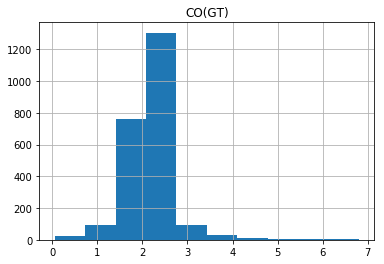

In [19]:
#histogram with the absolute error
abs((y_test - np.dot(X_test, w))).hist()

Write the explanation to your answer here.

Adding regularisation have effect on the model. Specifically, it gets a smoother decision boundary and improves model training results.

## Question 8: training with gradient descent and validation (5 marks)


Use gradient descent to iteratively compute the value of $\mathbf{w}_{\text{new}}$. Instead of using all the training set to compute the gradient, use a subset of $B$ datapoints in the training set. This is sometimes called minibatch gradient descent where $B$ is the size of the minibacth. When using gradient descent with minibatches, you need to find the best values for three parameters: $\eta$, the learning rate, $B$, the number of datapoints in the minibatch and $\alpha$, the regularisation parameter.

* As you did on Question 6, create a grid of values for the parameters $\alpha$ and $\eta$ using `np.logspace` and a grid of values for $B$ using np.linspace. Because you need to find 
 three parameters, start with `num=5` and see if you can increase it.

* Use the same training set and validation set that you used in Question 6.

* For each value that you have of $\alpha$, $\eta$ and $B$ from the previous step, use the training set to compute $\mathbf{w}$ using minibatch gradient descent and then measure the MSE over the validation data. For the minibatch gradient descent choose to stop the iterative procedure after $500$ iterations.

* Choose the values of $\alpha$, $\eta$ and $B$ that lead to the lower MSE and save them. You will use them at the test stage.

*3 marks of out of the 5 marks*


* Use the test set from Question 7 and provide the MSE obtained by having used minibatch training with the best values for $\alpha$, $\eta$ and $B$ over the WHOLE training data (not only the training set).

* Compare the performance of the closed form solution and the minibatch solution. Are the performances similar? Are the parameters $\mathbf{w}$ and $\alpha$ similar in both approaches? Please comment on both questions.

*2 marks of out of the 5 marks*

#### Question 8 Answer

In [20]:
# Write the code for your answer here
#create a grid of value for the parameters 𝛼, 𝜂 and B
𝛼 = np.logspace(-3, 2, 5)
𝜂 = np.logspace(-5, -2, 5)
B = np.linspace(50,500,5)
#Convert B[i] type to int
B = B.astype(np.int16)
for i in range(5):
    B[i] = np.asscalar(B[i])
#use the training set to compute w using minibatch gradient descent 
#(Assume 𝛼 = 𝛼[0], 𝜂 = 𝜂[0], and B = B[0])
n = B[0]
length = len(w)
I = identity(length).toarray()
w = np.random.normal(size=(X_train.shape[1],1))# Initialize w

def MGD_one(max_iter):
    for iteration in range(max_iter):
        global w
        np.random.shuffle(splitTrainData_train.index.values)
        y_train = splitTrainData_train.loc[:,["CO(GT)"]]
        X_train = splitTrainData_train.drop(["CO(GT)"], axis = 1)
        y_batch = y_train.iloc[0:B[0],:]
        X_batch = X_train.iloc[0:B[0],:]
        obj = 𝜂[0]*(-2/n*np.dot(X_batch.T, y_batch) + 2/n*np.dot(X_batch.T, np.dot(X_batch,w)) + 𝛼[0]*np.dot(I,w) )
        w = w - obj
    print(w)

max_iter = 500
MGD_one(max_iter)

#measure the MSE over the validation data
n = len(y_val)
f = np.dot(X_val, w)
MSE_init = ((y_val - f)**2 / n).sum()
print(MSE_init)





C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  if __name__ == '__main__':


[[-0.20275742]
 [-0.09506076]
 [-1.39881904]
 [-1.19918006]
 [ 0.06346507]
 [-0.78156959]
 [ 0.22204161]
 [ 0.83940976]
 [ 0.22453323]
 [-0.34610923]
 [-1.78726769]]
CO(GT)    22.827734
dtype: float64


In [21]:
#Choose the values of 𝛼, 𝜂 and B that lead to the lower MSE
choose_𝛼 = 0
choose_𝜂 = 0
choose_B = 0
for i in range(len(𝛼)):
    for j in range(len(𝜂)):
        for k in range(len(B)):
            n = B[k]
            w = np.random.normal(size=(X_train.shape[1],1))
            length = len(w)
            I = identity(length).toarray()
            def MGD_two(max_iter):
                for iteration in range(max_iter):
                    global w
                    np.random.shuffle(splitTrainData_train.values)
                    y_train = splitTrainData_train.loc[:,["CO(GT)"]]
                    X_train = splitTrainData_train.drop(["CO(GT)"], axis = 1)
                    y_batch = y_train.iloc[0:B[k],:]
                    X_batch = X_train.iloc[0:B[k],:]
                    obj = 𝜂[j]*(-2/n*np.dot(X_batch.T, y_batch) + 2/n*np.dot(X_batch.T, np.dot(X_batch,w)) + 𝛼[i]*np.dot(I,w) )
                    w = w - obj
            max_iter = 500
            MGD_two(max_iter)
            n = len(y_val)
            f = np.dot(X_val, w)
            MSE = ((y_val - f)**2 / n).sum()
            if MSE.iloc[0] < MSE_init.iloc[0]:
                MSE_init = MSE
                choose_𝛼 = 𝛼[i]
                choose_𝜂 = 𝜂[j]
                choose_B = B[k]
        
print(choose_𝛼)
print(choose_𝜂)
print(choose_B)

0.31622776601683794
0.01
162


In [22]:
#provide the MSE obtained by having used minibatch training with the best values for 𝛼 , 𝜂 and B over the WHOLE training data

n =  choose_B
w = np.random.normal(size=(X_train.shape[1],1))
length = len(w)
I = identity(length).toarray()
def MGD_three(max_iter):
    for iteration in range(max_iter):
        global w
        np.random.shuffle(splitData_train_new.values)
        y_train = splitData_train_new.loc[:,["CO(GT)"]]
        X_train = splitData_train_new.drop(["CO(GT)"], axis = 1)
        y_batch = y_train.iloc[0:choose_B,:]
        X_batch = X_train.iloc[0:choose_B,:]
        obj = choose_𝜂 *(-2/n*np.dot(X_batch.T, y_batch) + 2/n*np.dot(X_batch.T, np.dot(X_batch,w)) + choose_𝛼 *np.dot(I,w) )
        w = w - obj
    print(w)

max_iter = 500
MGD_three(max_iter)

n = len(y_test)
f_test = np.dot(X_test, w)
MSE_test = ((y_test - f_test)**2 / n).sum()
print(MSE_test)

[[ 0.16230327]
 [ 0.24508081]
 [ 0.24930375]
 [ 0.40707725]
 [ 0.05741468]
 [ 0.11515122]
 [ 0.3416381 ]
 [ 0.09034843]
 [-0.06325806]
 [-0.0387681 ]
 [-0.13926793]]
CO(GT)    4.959738
dtype: float64


Write the answer to your last question here.

The performance of the closed form solution and the minibatch solution is very similar, we can see that the MSE on the closed form and the minibatch solution are 4.95737 and 4.959738 separately.

The parameters 𝛼 and w are not similar in these two approaches.